In [1]:
using Printf
using Random

# Load X and y variable
using JLD

using PyPlot

# 1.1 Regularization

With sigma = 0.000, validError = 36474.63
With sigma = 0.000, validError = 36474.63
With sigma = 0.000, validError = 36474.63
With sigma = 0.000, validError = 36474.01
With sigma = 0.000, validError = 36282.75
With sigma = 0.001, validError = 35833.95
With sigma = 0.002, validError = 35618.88
With sigma = 0.004, validError = 34143.85
With sigma = 0.008, validError = 31524.12
With sigma = 0.016, validError = 27817.07
With sigma = 0.031, validError = 22543.90
With sigma = 0.063, validError = 17648.45
With sigma = 0.125, validError = 444853.74
With sigma = 0.250, validError = 7833458.24
With sigma = 0.500, validError = 4972310.05
With sigma = 1.000, validError = 658.45
With sigma = 2.000, validError = 778.16
With sigma = 4.000, validError = 557.61
With sigma = 8.000, validError = 260.91
With sigma = 16.000, validError = 263.93
With sigma = 32.000, validError = 254.33
With sigma = 64.000, validError = 256.42
With sigma = 128.000, validError = 2258.37
With sigma = 256.000, validError = 2302

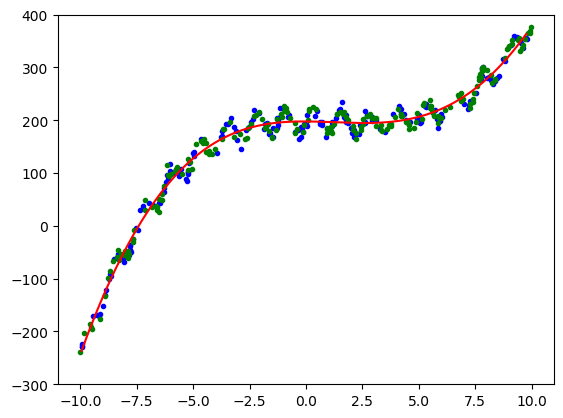

32.000, testError = 239.59


(-300, 400)

In [2]:
include("example_RBF.jl")

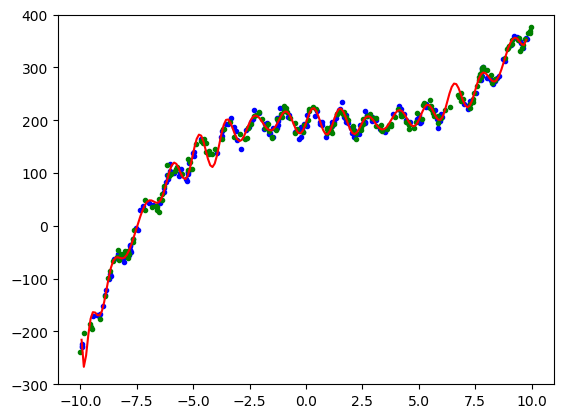

With sigma = 0.000, validError = 40656.99
With sigma = 0.000, validError = 40656.99
With sigma = 0.000, validError = 40656.99
With sigma = 0.000, validError = 40656.37
With sigma = 0.000, validError = 40465.12
With sigma = 0.001, validError = 40016.43
With sigma = 0.002, validError = 39745.51
With sigma = 0.004, validError = 38360.44
With sigma = 0.008, validError = 35598.96
With sigma = 0.016, validError = 30387.81
With sigma = 0.031, validError = 24272.25
With sigma = 0.063, validError = 17710.39
With sigma = 0.125, validError = 50169.21
With sigma = 0.250, validError = 582261.99
With sigma = 0.500, validError = 29345.97
With sigma = 1.000, validError = 155.09
With sigma = 2.000, validError = 271.62
With sigma = 4.000, validError = 278.59
With sigma = 8.000, validError = 296.96
With sigma = 16.000, validError = 283.90
With sigma = 32.000, validError = 282.24
With sigma = 64.000, validError = 560.53
With sigma = 128.000, validError = 2369.86
With sigma = 256.000, validError = 2385.51


(-300, 400)

In [3]:
include("example_RBF.jl")

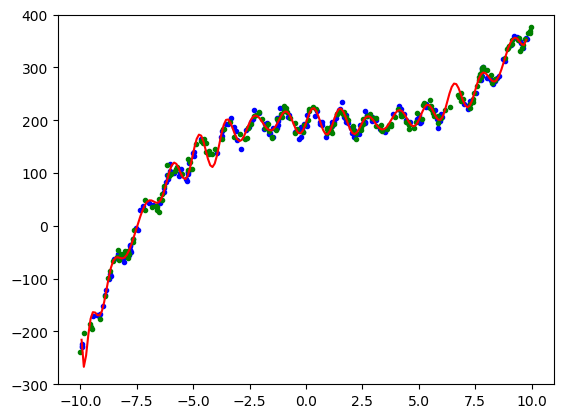

With sigma = 0.000, validError = 34147.33
With sigma = 0.000, validError = 34147.31
With sigma = 0.000, validError = 34100.01
With sigma = 0.000, validError = 33902.83
With sigma = 0.000, validError = 33574.52
With sigma = 0.001, validError = 33188.11
With sigma = 0.002, validError = 32921.02
With sigma = 0.004, validError = 31683.43
With sigma = 0.008, validError = 29682.28
With sigma = 0.016, validError = 25556.92
With sigma = 0.031, validError = 19100.95
With sigma = 0.063, validError = 18036.50
With sigma = 0.125, validError = 869419.58
With sigma = 0.250, validError = 20355259.39
With sigma = 0.500, validError = 39297.08
With sigma = 1.000, validError = 83.83
With sigma = 2.000, validError = 335.72
With sigma = 4.000, validError = 298.90
With sigma = 8.000, validError = 269.91
With sigma = 16.000, validError = 274.91
With sigma = 32.000, validError = 275.59
With sigma = 64.000, validError = 277.02
With sigma = 128.000, validError = 2202.11
With sigma = 256.000, validError = 2305.9

(-300, 400)

In [4]:
include("example_RBF.jl")

### Add L2 regularization

In [5]:
using LinearAlgebra
function leastSquaresRBF_L2regularize(X,y,sigma,lambda)
	(n,d) = size(X)

	Z = rbf(X,X,sigma)

	w = (Z'*Z + UniformScaling(lambda))\(Z'*y)

	predict(Xhat) = rbf(Xhat,X,sigma)*w

	return LinearModel(predict,w)
end

leastSquaresRBF_L2regularize (generic function with 1 method)

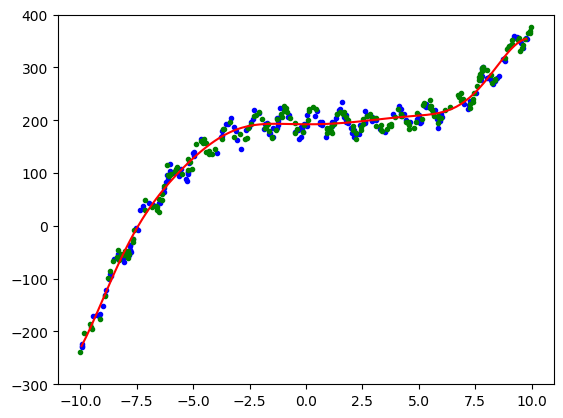

With sigma = 0.000, validError = 38331.13
With sigma = 0.000, validError = 38331.10
With sigma = 0.000, validError = 38283.39
With sigma = 0.000, validError = 38067.07
With sigma = 0.000, validError = 37590.71
With sigma = 0.001, validError = 36946.61
With sigma = 0.002, validError = 36773.11
With sigma = 0.004, validError = 35940.30
With sigma = 0.008, validError = 33483.64
With sigma = 0.016, validError = 29540.14
With sigma = 0.031, validError = 23394.15
With sigma = 0.063, validError = 14949.00
With sigma = 0.125, validError = 89591.86
With sigma = 0.250, validError = 15954.68
With sigma = 0.500, validError = 908.10
With sigma = 1.000, validError = 10198.52
With sigma = 2.000, validError = 8210.39
With sigma = 4.000, validError = 259.80
With sigma = 8.000, validError = 270.12
With sigma = 16.000, validError = 275.59
With sigma = 32.000, validError = 307.83
With sigma = 64.000, validError = 2789.20
With sigma = 128.000, validError = 4147.15
With sigma = 256.000, validError = 4654.18

(-300, 400)

In [6]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
perm = randperm(n)
validStart = Int64(n/2+1) # Start of validation indices
validEnd = Int64(n) # End of validation incides
validNdx = perm[validStart:validEnd] # Indices of validation examples
trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
Xtrain = X[trainNdx,:]
ytrain = y[trainNdx]
Xvalid = X[validNdx,:]
yvalid = y[validNdx]

# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
minErr = Inf
bestSigma = []
for sigma in 2.0.^(-15:15)

	# Train on the training set
	model = leastSquaresRBF_L2regularize(Xtrain,ytrain,sigma,1e-12)

	# Compute the error on the validation set
	yhat = model.predict(Xvalid)
	validError = sum((yhat - yvalid).^2)/(n/2)
	@printf("With sigma = %.3f, validError = %.2f\n",sigma,validError)

	# Keep track of the lowest validation error
	if validError < minErr
		global minErr = validError
		global bestSigma = sigma
	end

end

# Now fit the model based on the full dataset
model = leastSquaresRBF_L2regularize(X,y,bestSigma,1e-12)

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))


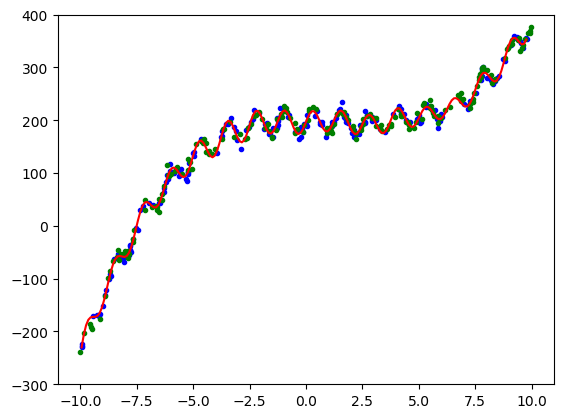

With sigma = 0.000, validError = 32815.38
With sigma = 0.000, validError = 32815.38
With sigma = 0.000, validError = 32815.38
With sigma = 0.000, validError = 32807.43
With sigma = 0.000, validError = 32520.77
With sigma = 0.001, validError = 32096.79
With sigma = 0.002, validError = 31847.32
With sigma = 0.004, validError = 30197.42
With sigma = 0.008, validError = 27782.94
With sigma = 0.016, validError = 24742.55
With sigma = 0.031, validError = 36586.23
With sigma = 0.063, validError = 131440.87
With sigma = 0.125, validError = 727498.75
With sigma = 0.250, validError = 74824.17
With sigma = 0.500, validError = 1018.33
With sigma = 1.000, validError = 75.31
With sigma = 2.000, validError = 321.00
With sigma = 4.000, validError = 240.01
With sigma = 8.000, validError = 247.65
With sigma = 16.000, validError = 245.54
With sigma = 32.000, validError = 242.61
With sigma = 64.000, validError = 2073.94
With sigma = 128.000, validError = 2358.55
With sigma = 256.000, validError = 2846.65


(-300, 400)

In [7]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
perm = randperm(n)
validStart = Int64(n/2+1) # Start of validation indices
validEnd = Int64(n) # End of validation incides
validNdx = perm[validStart:validEnd] # Indices of validation examples
trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
Xtrain = X[trainNdx,:]
ytrain = y[trainNdx]
Xvalid = X[validNdx,:]
yvalid = y[validNdx]

# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
minErr = Inf
bestSigma = []
for sigma in 2.0.^(-15:15)

	# Train on the training set
	model = leastSquaresRBF_L2regularize(Xtrain,ytrain,sigma,1e-12)

	# Compute the error on the validation set
	yhat = model.predict(Xvalid)
	validError = sum((yhat - yvalid).^2)/(n/2)
	@printf("With sigma = %.3f, validError = %.2f\n",sigma,validError)

	# Keep track of the lowest validation error
	if validError < minErr
		global minErr = validError
		global bestSigma = sigma
	end

end

# Now fit the model based on the full dataset
model = leastSquaresRBF_L2regularize(X,y,bestSigma,1e-12)

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))


With sigma = 0.000, validError = 39130.63
With sigma = 0.000, validError = 39130.60
With sigma = 0.000, validError = 39082.89
With sigma = 0.000, validError = 38874.94
With sigma = 0.000, validError = 38721.13
With sigma = 0.001, validError = 38474.42
With sigma = 0.002, validError = 38216.51
With sigma = 0.004, validError = 36752.75
With sigma = 0.008, validError = 34784.27
With sigma = 0.016, validError = 31905.50
With sigma = 0.031, validError = 28074.83
With sigma = 0.063, validError = 25185.52
With sigma = 0.125, validError = 79841.16
With sigma = 0.250, validError = 65399.28
With sigma = 0.500, validError = 5460.95
With sigma = 1.000, validError = 97.21
With sigma = 2.000, validError = 270.23
With sigma = 4.000, validError = 262.77
With sigma = 8.000, validError = 264.38
With sigma = 16.000, validError = 277.09
With sigma = 32.000, validError = 262.94
With sigma = 64.000, validError = 2405.71
With sigma = 128.000, validError = 3429.87
With sigma = 256.000, validError = 3921.90
Wi

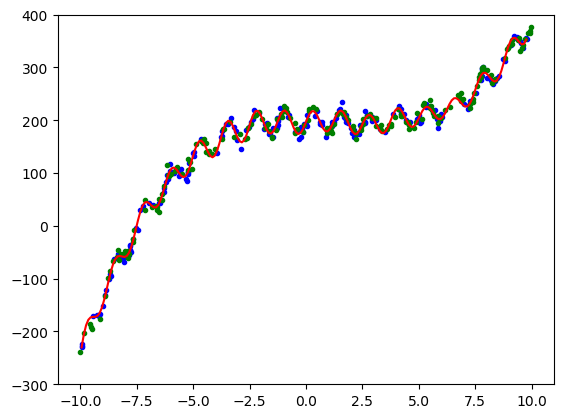

512.000, validError = 3945.94
With sigma = 1024.000, validError = 7438.97
With sigma = 2048.000, validError = 17366.20
With sigma = 4096.000, validError = 17799.46
With sigma = 8192.000, validError = 17806.41
With sigma = 16384.000, validError = 17806.52
With sigma = 32768.000, validError = 17806.52
With best sigma of 1.000, testError = 71.17


(-300, 400)

In [8]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
perm = randperm(n)
validStart = Int64(n/2+1) # Start of validation indices
validEnd = Int64(n) # End of validation incides
validNdx = perm[validStart:validEnd] # Indices of validation examples
trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
Xtrain = X[trainNdx,:]
ytrain = y[trainNdx]
Xvalid = X[validNdx,:]
yvalid = y[validNdx]

# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
minErr = Inf
bestSigma = []
for sigma in 2.0.^(-15:15)

	# Train on the training set
	model = leastSquaresRBF_L2regularize(Xtrain,ytrain,sigma,1e-12)

	# Compute the error on the validation set
	yhat = model.predict(Xvalid)
	validError = sum((yhat - yvalid).^2)/(n/2)
	@printf("With sigma = %.3f, validError = %.2f\n",sigma,validError)

	# Keep track of the lowest validation error
	if validError < minErr
		global minErr = validError
		global bestSigma = sigma
	end

end

# Now fit the model based on the full dataset
model = leastSquaresRBF_L2regularize(X,y,bestSigma,1e-12)

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))


# 1.2 Cross-Validation


With sigma = 0.000, split = 0 validError = 8931.21
With sigma = 0.000, split = 1 validError = 7689.94
With sigma = 0.000, split = 2 validError = 5507.20
With sigma = 0.000, split = 3 validError = 8471.58
With sigma = 0.000, split = 4 validError = 6730.49
With sigma = 0.000, split = 5 validError = 8517.05
With sigma = 0.000, split = 6 validError = 8258.74
With sigma = 0.000, split = 7 validError = 6907.89
With sigma = 0.000, split = 8 validError = 7179.48
With sigma = 0.000, split = 9 validError = 7704.24

With sigma = 0.000, split = 0 validError = 8931.21
With sigma = 0.000, split = 1 validError = 7689.94
With sigma = 0.000, split = 2 validError = 5507.20
With sigma = 0.000, split = 3 validError = 8471.58
With sigma = 0.000, split = 4 validError = 6730.49
With sigma = 0.000, split = 5 validError = 8517.05
With sigma = 0.000, split = 6 validError = 8258.74
With sigma = 0.000, split = 7 validError = 6907.89
With sigma = 0.000, split = 8 validError = 7179.48
With sigma = 0.000, split = 9

With sigma = 8.000, split = 2 validError = 44.62
With sigma = 8.000, split = 3 validError = 61.21
With sigma = 8.000, split = 4 validError = 45.93
With sigma = 8.000, split = 5 validError = 47.67
With sigma = 8.000, split = 6 validError = 58.21
With sigma = 8.000, split = 7 validError = 71.36
With sigma = 8.000, split = 8 validError = 68.42
With sigma = 8.000, split = 9 validError = 51.87

With sigma = 16.000, split = 0 validError = 35.58
With sigma = 16.000, split = 1 validError = 54.09
With sigma = 16.000, split = 2 validError = 39.98
With sigma = 16.000, split = 3 validError = 53.19
With sigma = 16.000, split = 4 validError = 49.04
With sigma = 16.000, split = 5 validError = 54.92
With sigma = 16.000, split = 6 validError = 57.42
With sigma = 16.000, split = 7 validError = 73.41
With sigma = 16.000, split = 8 validError = 68.98
With sigma = 16.000, split = 9 validError = 45.67

With sigma = 32.000, split = 0 validError = 37.38
With sigma = 32.000, split = 1 validError = 52.70
With s

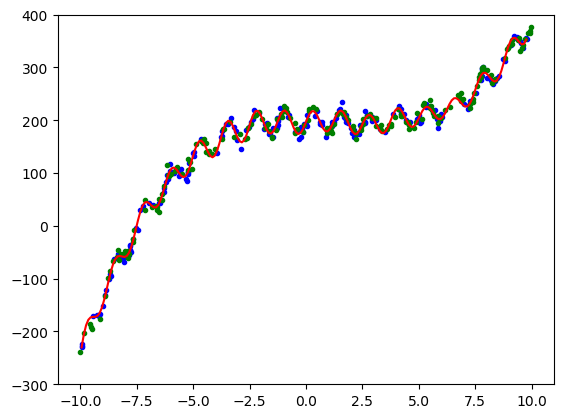

With sigma = 16384.000, split = 2 validError = 4765.03
With sigma = 16384.000, split = 3 validError = 2628.38
With sigma = 16384.000, split = 4 validError = 3478.31
With sigma = 16384.000, split = 5 validError = 4543.60
With sigma = 16384.000, split = 6 validError = 3358.29
With sigma = 16384.000, split = 7 validError = 2454.19
With sigma = 16384.000, split = 8 validError = 3183.34
With sigma = 16384.000, split = 9 validError = 1510.31

With sigma = 32768.000, split = 0 validError = 2672.89
With sigma = 32768.000, split = 1 validError = 2673.04
With sigma = 32768.000, split = 2 validError = 4765.03
With sigma = 32768.000, split = 3 validError = 2628.38
With sigma = 32768.000, split = 4 validError = 3478.31
With sigma = 32768.000, split = 5 validError = 4543.60
With sigma = 32768.000, split = 6 validError = 3358.29
With sigma = 32768.000, split = 7 validError = 2454.19
With sigma = 32768.000, split = 8 validError = 3183.34
With sigma = 32768.000, split = 9 validError = 1510.32
With best

(-300, 400)

In [9]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
split = Int(n / 10)
perm = randperm(n)
# validStart = Int64(n/2+1) # Start of validation indices
# validEnd = Int64(n) # End of validation incides
# validNdx = perm[validStart:validEnd] # Indices of validation examples
# trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
# Xtrain = X[trainNdx,:]
# ytrain = y[trainNdx]
# Xvalid = X[validNdx,:]
# yvalid = y[validNdx]

# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
minErr = Inf
bestSigma = []
for sigma in 2.0.^(-15:15)
    
    totalValidError = 0
    println()
    for i in 0:9
        validStart = split * i + 1
        validEnd = split * (i+1)
        validNdx = perm[validStart:validEnd] # Indices of validation examples
        trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
        Xtrain = X[trainNdx,:]
        ytrain = y[trainNdx]
        Xvalid = X[validNdx,:]
        yvalid = y[validNdx]
        
        # Train on the training set
        model = leastSquaresRBF_L2regularize(Xtrain,ytrain,sigma,1e-12)

        # Compute the error on the validation set
        yhat = model.predict(Xvalid)
        validError = sum((yhat - yvalid).^2)/(n/2)
        @printf("With sigma = %.3f, split = %d validError = %.2f\n",sigma,i,validError)

        totalValidError += validError/10
    end
    
    # Keep track of the lowest validation error
    if totalValidError < minErr
        global minErr = totalValidError
        global bestSigma = sigma
    end
end

# Now fit the model based on the full dataset
model = leastSquaresRBF_L2regularize(X,y,bestSigma,1e-12)

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))



With sigma = 0.000, split = 0 validError = 8200.42
With sigma = 0.000, split = 1 validError = 6750.95
With sigma = 0.000, split = 2 validError = 7991.83
With sigma = 0.000, split = 3 validError = 9378.30
With sigma = 0.000, split = 4 validError = 5980.19
With sigma = 0.000, split = 5 validError = 7520.79
With sigma = 0.000, split = 6 validError = 9247.54
With sigma = 0.000, split = 7 validError = 6628.42
With sigma = 0.000, split = 8 validError = 8369.65
With sigma = 0.000, split = 9 validError = 5829.72

With sigma = 0.000, split = 0 validError = 8200.42
With sigma = 0.000, split = 1 validError = 6750.95
With sigma = 0.000, split = 2 validError = 7991.83
With sigma = 0.000, split = 3 validError = 9378.28
With sigma = 0.000, split = 4 validError = 5980.19
With sigma = 0.000, split = 5 validError = 7520.79
With sigma = 0.000, split = 6 validError = 9247.54
With sigma = 0.000, split = 7 validError = 6628.42
With sigma = 0.000, split = 8 validError = 8369.65
With sigma = 0.000, split = 9

With sigma = 2.000, split = 8 validError = 52.06
With sigma = 2.000, split = 9 validError = 35.01

With sigma = 4.000, split = 0 validError = 43.73
With sigma = 4.000, split = 1 validError = 53.20
With sigma = 4.000, split = 2 validError = 62.52
With sigma = 4.000, split = 3 validError = 53.22
With sigma = 4.000, split = 4 validError = 50.20
With sigma = 4.000, split = 5 validError = 65.60
With sigma = 4.000, split = 6 validError = 66.32
With sigma = 4.000, split = 7 validError = 39.79
With sigma = 4.000, split = 8 validError = 64.00
With sigma = 4.000, split = 9 validError = 28.93

With sigma = 8.000, split = 0 validError = 52.57
With sigma = 8.000, split = 1 validError = 41.13
With sigma = 8.000, split = 2 validError = 66.75
With sigma = 8.000, split = 3 validError = 64.85
With sigma = 8.000, split = 4 validError = 54.30
With sigma = 8.000, split = 5 validError = 59.76
With sigma = 8.000, split = 6 validError = 67.68
With sigma = 8.000, split = 7 validError = 39.93
With sigma = 8.000

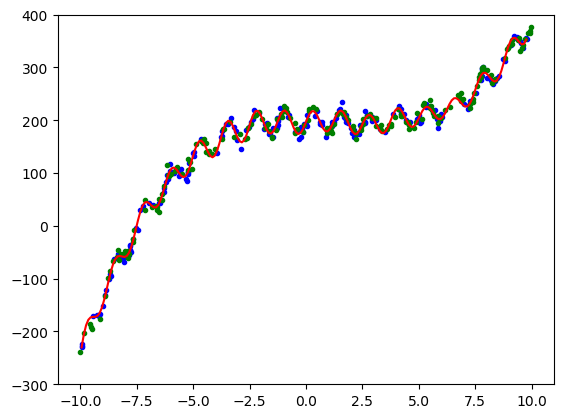

With best sigma of 1.000, testError = 71.17


(-300, 400)

In [10]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
split = Int(n / 10)
perm = randperm(n)
# validStart = Int64(n/2+1) # Start of validation indices
# validEnd = Int64(n) # End of validation incides
# validNdx = perm[validStart:validEnd] # Indices of validation examples
# trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
# Xtrain = X[trainNdx,:]
# ytrain = y[trainNdx]
# Xvalid = X[validNdx,:]
# yvalid = y[validNdx]

# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
minErr = Inf
bestSigma = []
for sigma in 2.0.^(-15:15)
    
    totalValidError = 0
    println()
    for i in 0:9
        validStart = split * i + 1
        validEnd = split * (i+1)
        validNdx = perm[validStart:validEnd] # Indices of validation examples
        trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
        Xtrain = X[trainNdx,:]
        ytrain = y[trainNdx]
        Xvalid = X[validNdx,:]
        yvalid = y[validNdx]
        
        # Train on the training set
        model = leastSquaresRBF_L2regularize(Xtrain,ytrain,sigma,1e-12)

        # Compute the error on the validation set
        yhat = model.predict(Xvalid)
        validError = sum((yhat - yvalid).^2)/(n/2)
        @printf("With sigma = %.3f, split = %d validError = %.2f\n",sigma,i,validError)

        totalValidError += validError/10
    end
    
    # Keep track of the lowest validation error
    if totalValidError < minErr
        global minErr = totalValidError
        global bestSigma = sigma
    end
end

# Now fit the model based on the full dataset
model = leastSquaresRBF_L2regularize(X,y,bestSigma,1e-12)

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))



With sigma = 0.000, split = 0 validError = 9811.50
With sigma = 0.000, split = 1 validError = 8156.31
With sigma = 0.000, split = 2 validError = 8897.77
With sigma = 0.000, split = 3 validError = 6275.88
With sigma = 0.000, split = 4 validError = 7096.28
With sigma = 0.000, split = 5 validError = 7269.25
With sigma = 0.000, split = 6 validError = 9335.56
With sigma = 0.000, split = 7 validError = 6155.75
With sigma = 0.000, split = 8 validError = 6297.99
With sigma = 0.000, split = 9 validError = 6601.53

With sigma = 0.000, split = 0 validError = 9811.50
With sigma = 0.000, split = 1 validError = 8156.31
With sigma = 0.000, split = 2 validError = 8897.75
With sigma = 0.000, split = 3 validError = 6275.85
With sigma = 0.000, split = 4 validError = 7096.28
With sigma = 0.000, split = 5 validError = 7269.25
With sigma = 0.000, split = 6 validError = 9335.56
With sigma = 0.000, split = 7 validError = 6155.75
With sigma = 0.000, split = 8 validError = 6297.99
With sigma = 0.000, split = 9

With sigma = 2.000, split = 4 validError = 38.69
With sigma = 2.000, split = 5 validError = 53.53
With sigma = 2.000, split = 6 validError = 41.93
With sigma = 2.000, split = 7 validError = 65.05
With sigma = 2.000, split = 8 validError = 56.28
With sigma = 2.000, split = 9 validError = 41.37

With sigma = 4.000, split = 0 validError = 70.22
With sigma = 4.000, split = 1 validError = 60.73
With sigma = 4.000, split = 2 validError = 35.89
With sigma = 4.000, split = 3 validError = 59.78
With sigma = 4.000, split = 4 validError = 41.63
With sigma = 4.000, split = 5 validError = 52.19
With sigma = 4.000, split = 6 validError = 47.00
With sigma = 4.000, split = 7 validError = 65.26
With sigma = 4.000, split = 8 validError = 55.39
With sigma = 4.000, split = 9 validError = 43.96

With sigma = 8.000, split = 0 validError = 70.22
With sigma = 8.000, split = 1 validError = 65.95
With sigma = 8.000, split = 2 validError = 40.98
With sigma = 8.000, split = 3 validError = 63.79
With sigma = 8.000

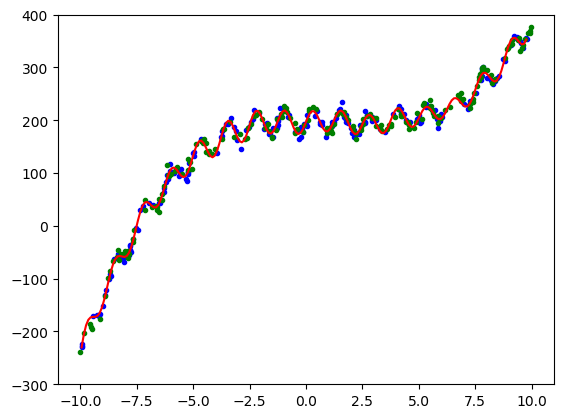

32768.000, split = 7 validError = 2833.16
With sigma = 32768.000, split = 8 validError = 5403.64
With sigma = 32768.000, split = 9 validError = 2963.51
With best sigma of 1.000, testError = 71.17


(-300, 400)

In [11]:
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
split = Int(n / 10)
perm = randperm(n)
# validStart = Int64(n/2+1) # Start of validation indices
# validEnd = Int64(n) # End of validation incides
# validNdx = perm[validStart:validEnd] # Indices of validation examples
# trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
# Xtrain = X[trainNdx,:]
# ytrain = y[trainNdx]
# Xvalid = X[validNdx,:]
# yvalid = y[validNdx]

# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
minErr = Inf
bestSigma = []
for sigma in 2.0.^(-15:15)
    
    totalValidError = 0
    println()
    for i in 0:9
        validStart = split * i + 1
        validEnd = split * (i+1)
        validNdx = perm[validStart:validEnd] # Indices of validation examples
        trainNdx = perm[setdiff(1:n,validStart:validEnd)] # Indices of training examples
        Xtrain = X[trainNdx,:]
        ytrain = y[trainNdx]
        Xvalid = X[validNdx,:]
        yvalid = y[validNdx]
        
        # Train on the training set
        model = leastSquaresRBF_L2regularize(Xtrain,ytrain,sigma,1e-12)

        # Compute the error on the validation set
        yhat = model.predict(Xvalid)
        validError = sum((yhat - yvalid).^2)/(n/2)
        @printf("With sigma = %.3f, split = %d validError = %.2f\n",sigma,i,validError)

        totalValidError += validError/10
    end
    
    # Keep track of the lowest validation error
    if totalValidError < minErr
        global minErr = totalValidError
        global bestSigma = sigma
    end
end

# Now fit the model based on the full dataset
model = leastSquaresRBF_L2regularize(X,y,bestSigma,1e-12)

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))
